# Comparison with DINGO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ddn3 import simulation, performance
from ddn3_extra import simulation_r, scan_r

# %load_ext autoreload
# %autoreload 2

In [9]:
n_node = 200
ratio_diff = 0
# ratio_diff = 0.25
graph_type = "hub"
omega, omega1, omega2 = simulation_r.huge_omega(
    n_node=n_node, ratio_diff=ratio_diff, graph_type=graph_type,
)
g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)

n1, n2 = 2000, 2000
dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n1, n2)

In [10]:
cc = np.corrcoef(dat1.T)
cc1 = np.linalg.inv(cc)

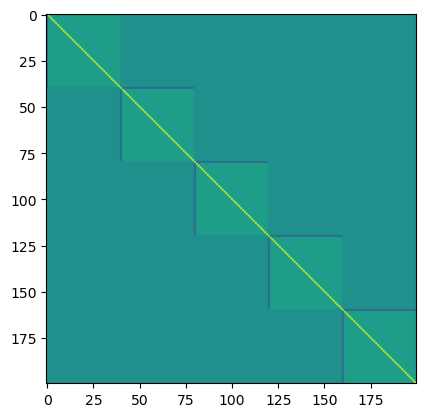

In [19]:
plt.imshow(g1_cov)
plt.clim(-1,1)

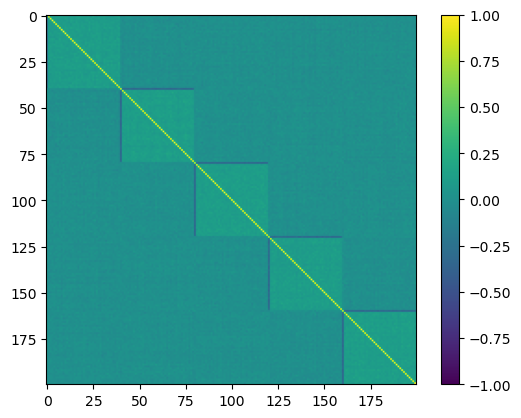

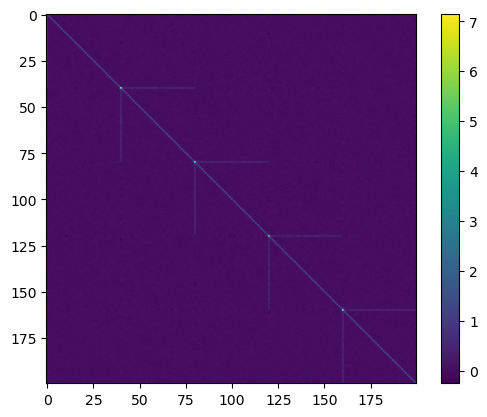

In [18]:
plt.figure()
plt.imshow(cc)
# plt.imshow(cc[:10,:10])
plt.clim(-1,1)
plt.colorbar()
plt.figure()
plt.imshow(cc1)
# plt.imshow(cc1[:10,:10])
# plt.clim(-1,1)
plt.colorbar()

## DINGO

In [ ]:
t1_dingo_a, t2_dingo_a, comm_dingo_a, diff_dingo_a, out_dingo_a = scan_r.scan_dingo(dat1, dat2, B=10, cores=10)
res_comm_dingo_auto, res_diff_dingo_auto = performance.scan_erro_measure_dingo(
    comm_dingo_a, diff_dingo_a, comm_gt, diff_gt
)
rho1_auto = np.array(out_dingo_a.rx2("rho"))

In [ ]:
# plt.plot(res_diff_dingo_auto[:,0], res_diff_dingo_auto[:,1])

In [ ]:
rho1_lst_dingo = np.arange(0.1, 1.1, 0.1)
res_comm_dingo_lst = []
res_diff_dingo_lst = []
for rho1 in rho1_lst_dingo:
    print(rho1)
    t1_dingo, t2_dingo, comm_dingo, diff_dingo, out_dingo = scan_r.scan_dingo(dat1, dat2, B=10, rho=rho1, cores=10)
    res_comm_dingo, res_diff_dingo = performance.scan_erro_measure_dingo(
        comm_dingo, diff_dingo, comm_gt, diff_gt
    )
    res_comm_dingo_lst.append(res_comm_dingo)
    res_diff_dingo_lst.append(res_diff_dingo)

res_comm_dingo_lst = np.array(res_comm_dingo_lst)
res_diff_dingo_lst = np.array(res_diff_dingo_lst)

In [43]:
np.savez(
    f"../output_simulation/ddn_jgl_dingo/run0/dingo_{graph_type}_0.npz",
    comm=res_comm_dingo_lst,
    diff=res_diff_dingo_lst,
    rho1_lst=rho1_lst_dingo,
    comm_auto=res_comm_dingo_auto,
    diff_auto=res_diff_dingo_auto,    
    rho1_auto=rho1_auto,
)

## Plot

In [3]:

from ddn3_extra import plot_simulation, scan_r
from cycler import cycler
default_cycler = (cycler(color=["#1F77B4", "#FF7F0E", "#3A3A3A", "#5CCEB3"]))
plt.rc('axes', prop_cycle=default_cycler)

top_folder = "../../../x_output/ddn/"


In [4]:
dat_dir = top_folder + "ddn_jgl/l1_002-002-100_l2_000-0025-015/"
# graph_type = "scale_free_1"
graph_type = "random"
res_name = "res_ddn_jgl_random_n_20_n-node_100_200p200_group_0"
# res_name = "res_ddn_jgl_scale-free_n_20_n-node_100_200p200"
temp = np.load(f"{dat_dir}/{graph_type}/{res_name}.npz")
res = temp['res']
l1_lst = temp['l1_lst']
l2_lst = temp['l2_lst']

dingo_temp = np.load(f"{top_folder}/ddn_jgl_dingo/run0/dingo_random_0.npz")
res_comm_dingo_auto = dingo_temp["comm_auto"]
res_diff_dingo_auto = dingo_temp["diff_auto"]
res_comm_dingo = dingo_temp["comm"]
res_diff_dingo = dingo_temp["diff"]
rho1_lst_dingo = dingo_temp["rho1_lst"]

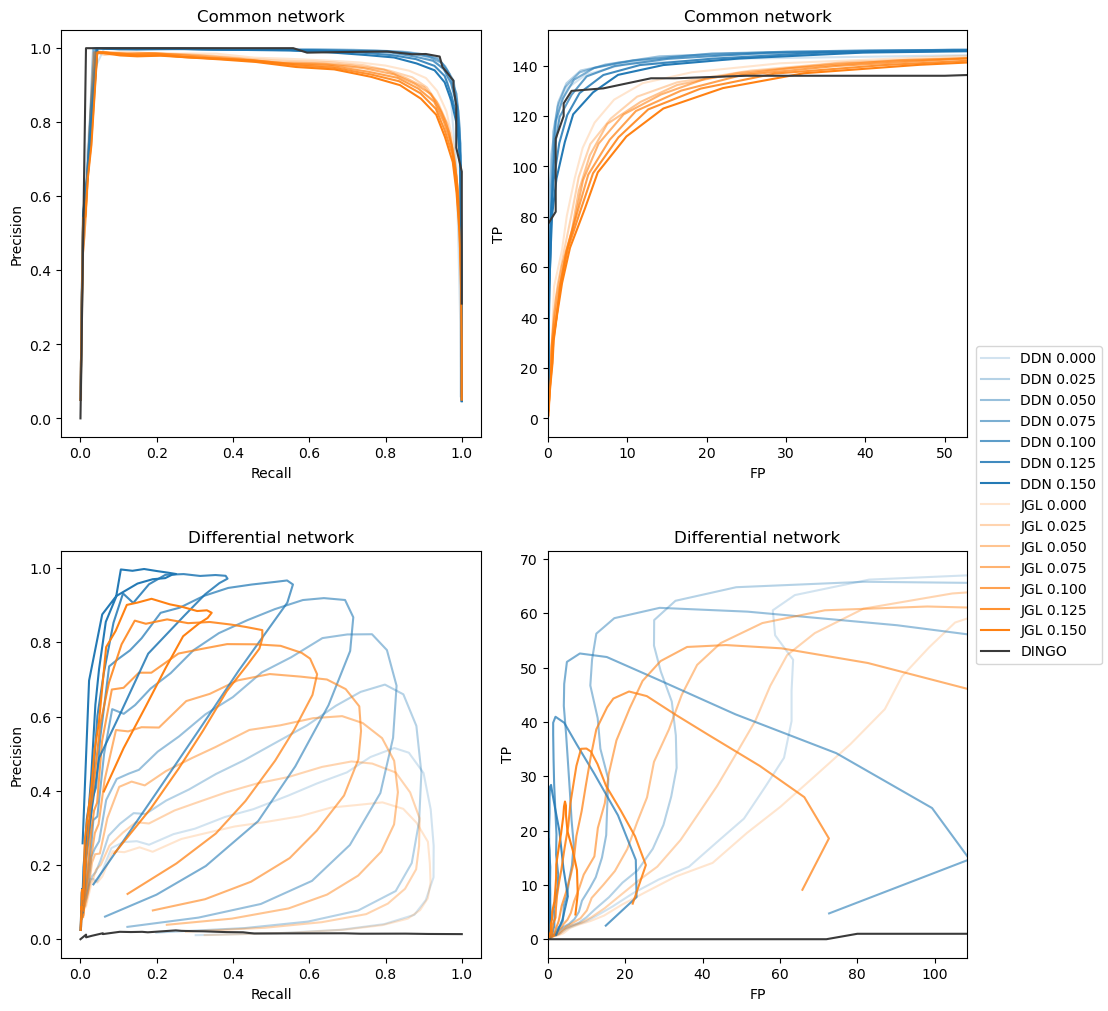

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(11, 10), layout="constrained")
plot_simulation.plot_ddn_jgl_simple1(ax, res, l2_lst)

plot_simulation.draw1(ax[0, 0], res_comm_dingo_auto, 2, 4, label='DINGO', color="#3A3A3A")
plot_simulation.draw1(ax[0, 1], res_comm_dingo_auto, 1, 0, color="#3A3A3A")
plot_simulation.draw1(ax[1, 0], res_diff_dingo_auto, 2, 4, color="#3A3A3A")
plot_simulation.draw1(ax[1, 1], res_diff_dingo_auto, 1, 0, color="#3A3A3A")

handles, labels = ax[0,0].get_legend_handles_labels()
order = list(range(0, len(labels)-1, 2)) + list(range(1, len(labels)-1, 2)) + [len(labels)-1]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
fig.legend(handles, labels, loc="outside right center")
fig.get_layout_engine().set(hspace=0.1)

fig.savefig("./figures/dingo_auto.png")

More DINGO curves

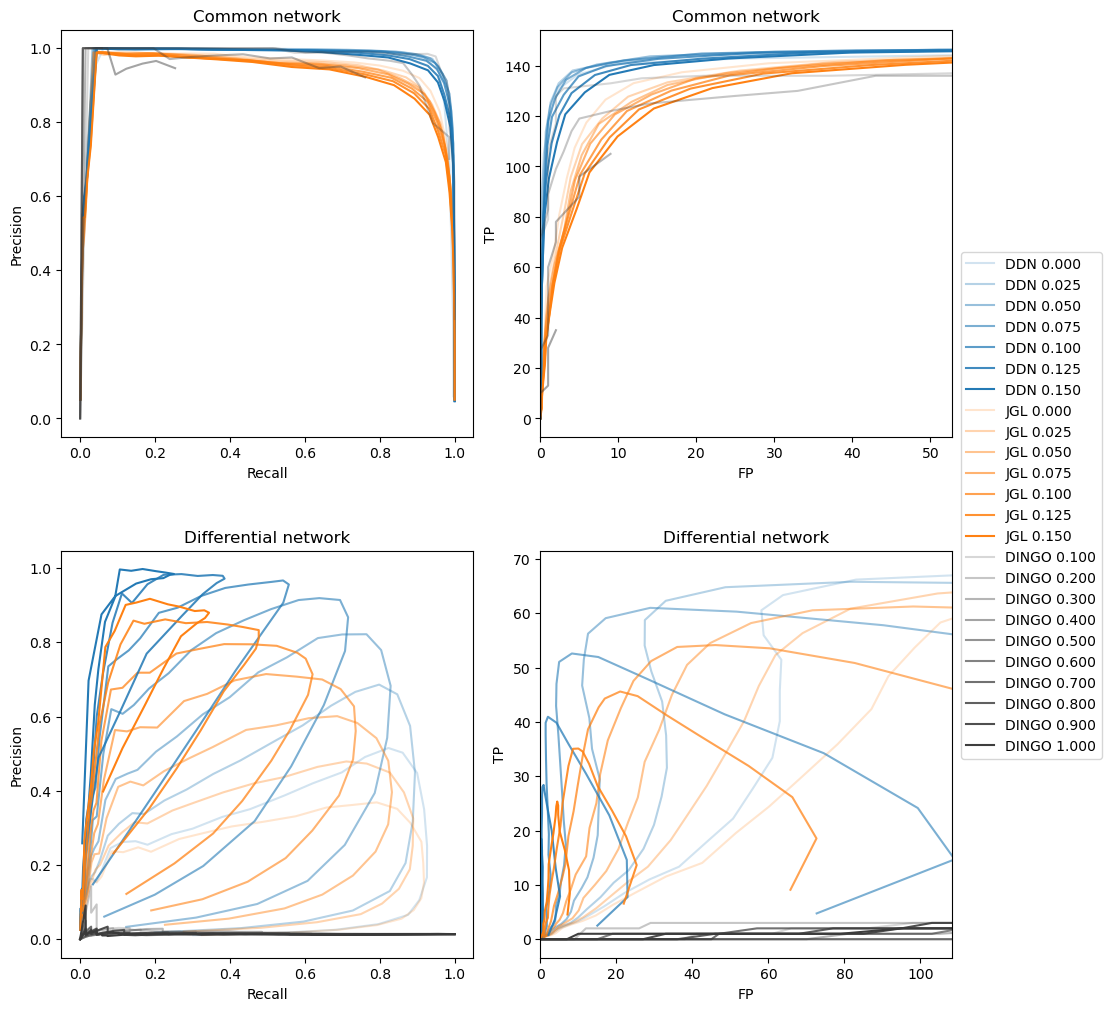

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(11, 10), layout="constrained")
plot_simulation.plot_ddn_jgl_simple1(ax, res, l2_lst)

for i in range(10):
    # print(i)
    alpha = 0.2 + 0.78 * i / (10 - 1)
    plot_simulation.draw1(ax[0, 0], res_comm_dingo[i], 2, 4, label=f"DINGO {rho1_lst_dingo[i]:.3f}", color="#3A3A3A", alpha=alpha)
    plot_simulation.draw1(ax[0, 1], res_comm_dingo[i], 1, 0, color="#3A3A3A", alpha=alpha)
    plot_simulation.draw1(ax[1, 0], res_diff_dingo[i], 2, 4, color="#3A3A3A", alpha=alpha)
    plot_simulation.draw1(ax[1, 1], res_diff_dingo[i], 1, 0, color="#3A3A3A", alpha=alpha)

handles, labels = ax[0,0].get_legend_handles_labels()
n_ddn_jgl_label = 14
n_dingo_label = 10
order = list(range(0, n_ddn_jgl_label, 2)) + list(range(1, n_ddn_jgl_label, 2)) + list(range(14,24))
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
fig.legend(handles, labels, loc="outside right center")
fig.get_layout_engine().set(hspace=0.1)
fig.savefig("./figures/dingo_manual.png")

## Optional: DDN and JGL

In [ ]:
l1_lst = np.arange(0.02, 1.02, 0.02)
# l2_lst = np.arange(0.0, 0.16, 0.05)

DDN

In [ ]:
t1_lst_ddn, t2_lst_ddn = scan_r.scan_ddn(dat1, dat2, lambda1_rg=l1_lst, lambda2=0.05)
res_comm_ddn, res_diff_ddn = performance.scan_error_measure(
    t1_lst_ddn, t2_lst_ddn, comm_gt, diff_gt
)

In [ ]:
plt.plot(res_diff_ddn[:,0], res_diff_ddn[:,1])

In [ ]:
plt.plot(res_diff_ddn[:,2], res_diff_ddn[:,4])

JGL

In [ ]:
t1_lst_jgl, t2_lst_jgl = scan_r.scan_jgl(dat1, dat2, lambda1_rg=l1_lst, lambda2=0.05)
res_comm_jgl, res_diff_jgl = performance.scan_error_measure(
    t1_lst_jgl, t2_lst_jgl, comm_gt, diff_gt
)

In [ ]:
plt.plot(res_diff_jgl[:,2], res_diff_jgl[:,4])

Output for debug

In [ ]:
# np.savetxt("dat1.csv", dat1, delimiter=",")
# np.savetxt("dat2.csv", dat2, delimiter=",")

In [ ]:
# xx = np.zeros(400)
# xx[:200] = 1
# xx[200:] = -1
# dat = np.vstack((dat1, dat2))
# np.corrcoef(xx, dat[:,0])